<a href="https://colab.research.google.com/github/TuanLamNguyen/AI_Secretary-Handwriting-Recognition/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_B%E1%BA%A3n_sao_c%E1%BB%A7a_AI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from skimage.transform import resize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/dataviettay/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('so_0'):  #Chữ số
    output= 0.0
  if file.startswith('so_1'):
    output= 1.0
  if file.startswith('so_2'):
    output= 2.0
  if file.startswith('so_3'):
    output= 3.0
  if file.startswith('so_4'):
    output= 4.0
  if file.startswith('so_5'):
    output= 5.0
  if file.startswith('so_6'):
    output= 6.0
  if file.startswith('so_7'):
    output= 7.0
  if file.startswith('so_8'):
    output= 8.0
  if file.startswith('so_9'):
    output= 9.0
  if file.startswith('A'):
    output= 10.0
  if file.startswith('B'):
    output= 11.0
  if file.startswith('C'):
    output= 12.0
  if file.startswith('D'):
    output= 13.0
  if file.startswith('E'):
    output= 14.0
  if file.startswith('F'):
    output= 15.0
  if file.startswith('G'):
    output= 16.0
  if file.startswith('H'):
    output= 17.0
  if file.startswith('I'):
    output= 18.0
  if file.startswith('J'):
    output= 19.0
  if file.startswith('K'):
    output= 20.0
  if file.startswith('L'):
    output= 21.0
  if file.startswith('M'):
    output= 22.0
  if file.startswith('N'):
    output= 23.0
  if file.startswith('O'):
    output= 24.0
  if file.startswith('P'):
    output= 25.0
  if file.startswith('Q'):
    output= 26.0
  if file.startswith('R'):
    output= 27.0
  if file.startswith('S'):
    output= 28.0
  if file.startswith('T'):
    output= 29.0
  if file.startswith('U'):
    output= 30.0
  if file.startswith('V'):
    output= 31.0
  if file.startswith('W'):
    output= 32.0
  if file.startswith('X'):
    output= 33.0
  if file.startswith('Y'):
    output= 34.0
  if file.startswith('Z'):
    output= 35.0
  photo = load_img(folder + file, target_size=(28,28))
  photo = img_to_array(photo)
  photo = resize(photo, (28, 28, 1))
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/EMNIST_data/viettay_photos.npy', photos)
save('/content/drive/MyDrive/EMNIST_data/viettay_labels.npy', labels)

In [ ]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/EMNIST_data/viettay_photos.npy')
labels = np.load('/content/drive/MyDrive/EMNIST_data/viettay_labels.npy')
# Preprocess data
photos = photos.astype('float32') / 255.0
from keras.utils import to_categorical
labels=to_categorical(labels,36)

In [ ]:
from sklearn.model_selection import train_test_split
photos_train,photos_test,labels_train,labels_test = train_test_split(photos,labels,test_size = 0.3)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout

In [ ]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import layers
from keras.utils import np_utils
classes = 36
# Define model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(36,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 64)        

In [ ]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(photos_train)

# Train model
history = model.fit(datagen.flow(photos_train, labels_train, batch_size=128), epochs=150, validation_data=(photos_test, labels_test))

# Evaluate model
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Test accuracy:', test_acc)

Epoch 1/150
198/198 [==============================] - 16s 46ms/step - loss: 3.7673 - accuracy: 0.1071 - val_loss: 10.1364 - val_accuracy: 0.0302
Epoch 2/150
198/198 [==============================] - 10s 51ms/step - loss: 2.6514 - accuracy: 0.2440 - val_loss: 6.4147 - val_accuracy: 0.0355
Epoch 3/150
198/198 [==============================] - 9s 46ms/step - loss: 2.0705 - accuracy: 0.3578 - val_loss: 2.0137 - val_accuracy: 0.3615
Epoch 4/150
198/198 [==============================] - 10s 48ms/step - loss: 1.7793 - accuracy: 0.4377 - val_loss: 5.3336 - val_accuracy: 0.1164
Epoch 5/150
198/198 [==============================] - 10s 53ms/step - loss: 1.5909 - accuracy: 0.4942 - val_loss: 2.4277 - val_accuracy: 0.2991
Epoch 6/150
198/198 [==============================] - 10s 51ms/step - loss: 1.4774 - accuracy: 0.5269 - val_loss: 1.7814 - val_accuracy: 0.4608
Epoch 7/150
198/198 [==============================] - 9s 46ms/step - loss: 1.3833 - accuracy: 0.5572 - val_loss: 1.2681 - val_acc

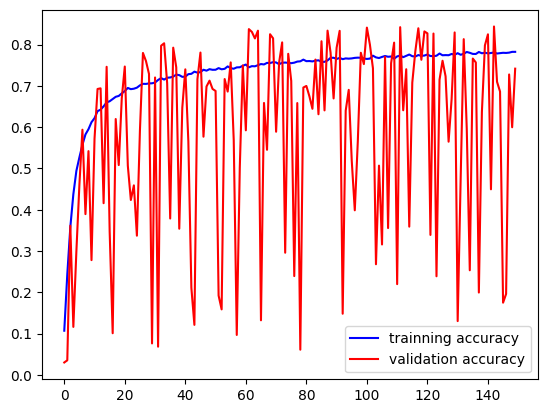

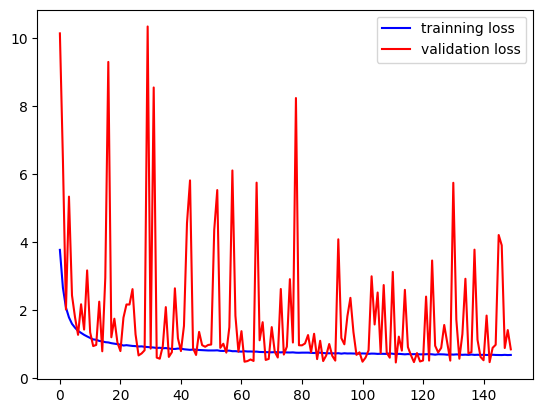

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
#test accuracy
print("Test Accuracy: {0:.2f}%".format(model.evaluate(photos_test,labels_test)[1]*100))

In [ ]:
model.save('/content/drive/MyDrive/EMNIST_data/Hand_writting1234.h5')

1/1 [==============================] - 0s 28ms/step
H


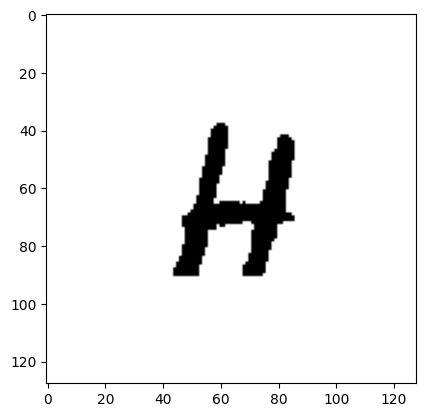

1/1 [==============================] - 0s 28ms/step
A


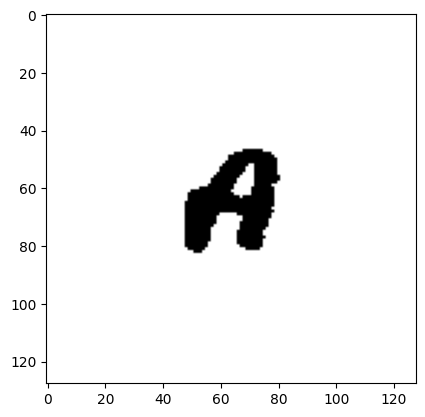

In [ ]:

#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
folder = '/content/drive/MyDrive/data_chu_viet_tay/test'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (28, 28))
  photo=img_to_array(photo)
  photo = resize(photo, (28, 28, 1))
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
  print(class_name[result])
  plt.show()